In [2]:
!pip install yfinance -U -q

In [3]:
import yfinance as yf
import pandas as pd


In [4]:
tickerSymbol = 'AAPL'
tickerData = yf.Ticker(tickerSymbol)
start_time="2022-01-11"
end_time="2022-01-18"

In [5]:
data = tickerData.history(tickers = tickerSymbol, interval = "1m", 
                          start=start_time, end=end_time)

data['typical price']=(data['High']+data['Low']+data['Close'])/3

In [6]:
data.shape[0]

1559

In [7]:
# drop useless varaiables
data=data.drop(['Dividends', 'Stock Splits'], axis=1)

In [8]:
data.head(7)

,Open,High,Low,Close,Volume,typical price
Datetime,,,,,,
2022-01-11 09:30:00-05:00,172.320007,172.699997,172.050003,172.509995,2349446,172.419998
2022-01-11 09:31:00-05:00,172.539993,172.539993,171.580002,171.632507,396256,171.917501
2022-01-11 09:32:00-05:00,171.630005,171.880005,171.529999,171.830002,317266,171.746668
2022-01-11 09:33:00-05:00,171.848007,171.869995,171.360001,171.399994,334610,171.543330
2022-01-11 09:34:00-05:00,171.750000,171.880905,171.610001,171.689896,259203,171.726934
2022-01-11 09:35:00-05:00,172.000000,172.050003,171.940002,171.989197,332931,171.993067
2022-01-11 09:36:00-05:00,172.227005,172.410004,172.080002,172.410004,346540,172.300003


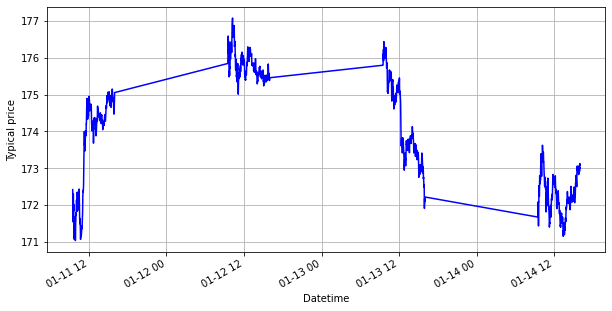

In [9]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
data['typical price'].plot(kind='line', c='b')
plt.grid('on')
plt.ylabel('Typical price')
plt.show()


In [10]:
skewness=data.skew(axis=0)
print('\nCheck the skewness of variables\n')
print(skewness)
print('\nCheck the kurtosis of variables\n')
kurtosis=data.kurtosis(axis=0)
print(kurtosis)


Check the skewness of variables

Open            -0.155334
High            -0.148128
Low             -0.159257
Close           -0.157163
Volume           9.840671
typical price   -0.154486
dtype: float64

Check the kurtosis of variables

Open              -1.250156
High              -1.232139
Low               -1.264238
Close             -1.250491
Volume           139.035658
typical price     -1.252404
dtype: float64


In [11]:
import os.path

filename=tickerSymbol+start_time+end_time+'.csv'
data.to_csv(filename)

if os.path.isfile(filename):
  print(filename + "  is saved!" + os.getcwd())
else:
  raise Exception(" cannot save file!\n")

AAPL2022-01-112022-01-18.csv  is saved!/content
